## Data Exploration

Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
%matplotlib inline
plt.style.use('ggplot')

Import dataset

In [2]:
#df0 = pd.read_csv('hdd0313cy.csv', low_memory=False, nrows=1000) # all columns, limited rows

In [4]:
#df0.shape
#(1544747, 135)

In [7]:
# Specify the selected field and their datatypes 

type_arrival = {'sex': 'category',
                'er_mode': 'category',
                'admtype': 'category',
                'yoa': 'float16',
                'diag_adm': 'category',
                'dx1': 'category',
                'dx2': 'category',
                'dx3': 'category',
                'dx4': 'category',
                'dx5': 'category',
                'dx6': 'category',
                'dx7': 'category',
                'dx8': 'category',
                'dx9': 'category',
                'dx10': 'category',
                'dx11': 'category',
                'dx12': 'category',
                'dx13': 'category',
                'dx14': 'category',
                'dx15': 'category',
                'dx16': 'category',
                'dx17': 'category',
                'dx18': 'category',
                'dx19': 'category',
                'dx20': 'category',
                'dx21': 'category',
                'dx22': 'category',
                'dx23': 'category',
                'dx24': 'category',
                'dx25': 'category', 
                'poa1': 'category', 
                'poa2': 'category', 
                'poa3': 'category', 
                'poa4': 'category', 
                'poa5': 'category', 
                'poa6': 'category', 
                'poa7': 'category', 
                'poa8': 'category', 
                'poa9': 'category', 
                'poa10': 'category', 
                'poa11': 'category',
                'poa12': 'category', 
                'poa13': 'category', 
                'poa14': 'category', 
                'poa15': 'category', 
                'poa16': 'category', 
                'poa17': 'category', 
                'poa18': 'category', 
                'poa19': 'category', 
                'poa20': 'category', 
                'poa21': 'category', 
                'poa22': 'category',
                'poa23': 'category',
                'poa24': 'category',
                'poa25': 'category',
                'pay_ub92': 'category',
                'provider': 'category', 
                'asource': 'category',
                'moa': 'float16',
                'age': 'float16',
                'race': 'category'}

type_target = {'tot': 'float64'}

type_departure = {'los': 'float64',  
                  'trandb': 'float64', 
                  'randbg': 'float64', 
                  'randbs': 'float64', 
                  'orr': 'float64',
                  'anes': 'float64',
                  'seq': 'float64', 
                  'lab': 'float64', 
                  'dtest': 'float64', 
                  'ther': 'float64', 
                  'blood': 'float64',
                  'phar': 'float64',
                  'psycchrg': 'float64',
                  'other': 'float64', 
                  'patcon': 'float64', 
                  'dispub92': 'category', 
                  'icu': 'float16', 
                  'ccu': 'float16',
                  'service': 'category',
                  'payer': 'category',
                 'er_fee': 'object',
                 'er_chrg': 'object'}

col_arrival = [*type_arrival]
col_departure = [*type_departure] #not used
col_target = [*type_target]

usecols = col_arrival + col_target
dtype = {}
for d in [type_arrival, type_target]:
    for k, v in d.items():
        dtype[k] = v

In [8]:
# import data using relevant columns
df1 = pd.read_csv('hdd0313cy.csv', 
                  usecols=usecols, 
                  dtype=dtype
                 )

Remove newborn data

In [17]:
df2 = df1.copy()
df2 = df2[df2.age > 0]
df2 = df2[df2.admtype != '4']
v = ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'Z', 'A']
df2 = df2[df2.admtype.isin(v)]
df2.shape

(1385592, 62)

Remove columns that are not known upon admission. Remove rows that are missing relevant data.

In [18]:
def getFullYear(y):
    '''Converts yoa from yy format to yyyy format'''
    if y == 0:
        return 2000
    elif y < 10:
        return float("200"+str(y))
    elif y < 25:
        return float("20"+str(y))
    elif y < 100:
        return float("19"+str(y))
    else:
        return y

In [6]:
#strip leading zeros and convert to float
#df2.er_fee = pd.to_numeric(df2.er_fee.str.lstrip('0')).astype('float64')
#df2.er_chrg = pd.to_numeric(df2.er_chrg.str.lstrip('0')).astype('float64')

In [19]:
df2.isnull().sum()

pay_ub92     124416
age               0
sex               0
provider          0
moa               0
yoa               0
admtype           0
asource        1278
dx1             769
dx2           40226
dx3          134439
dx4          249053
dx5          375378
dx6          503170
dx7          624961
tot               0
dx8          736954
dx9          837308
dx10         926137
dx11        1003799
diag_adm     251223
er_mode      431480
dx12        1100931
dx13        1150212
dx14        1192068
dx15        1227900
dx16        1262910
dx17        1288225
dx18        1307889
dx19        1323382
             ...   
dx22        1354313
dx23        1360732
dx24        1365868
dx25        1370264
race         250715
poa1         899775
poa2         917262
poa3         940518
poa4         958369
poa5         999525
poa6        1036568
poa7        1058259
poa8        1103316
poa9        1133885
poa10       1150425
poa11       1189547
poa12       1213840
poa13       1225153
poa14       1245390


In [20]:
df2 = df2[df2.sex != '9']
df2.sex.cat.remove_unused_categories()
print(df2.shape)
df2 = df2[df2.admtype != '9'] # rem
print(df2.shape)
df2 = df2[False == pd.isna(df2.admtype)]
print(df2.shape)
df2 = df2[False == pd.isna(df2.asource)]
print(df2.shape)
df2 = df2[False == pd.isna(df2.race)]
print(df2.shape)
#df2 = df2[False == pd.isna(df2.dx1)]
print(df2.shape)
df2 = df2[False == pd.isna(df2.er_mode)]
print(df2.shape)
df2 = df2[False == pd.isna(df2.diag_adm)]
print(df2.shape)
df2['yoa'] = df2['yoa'].apply(getFullYear)
df2 = df2[df2.yoa >= 2010]
print(df2.shape)
df2 = df2[df2.age <= 100]
print(df2.shape)
df2.isnull().sum()

(1385535, 62)
(1384779, 62)
(1384779, 62)
(1383501, 62)
(1134229, 62)
(1134229, 62)
(953625, 62)
(953192, 62)
(465251, 62)
(464957, 62)


pay_ub92         0
age              0
sex              0
provider         0
moa              0
yoa              0
admtype          0
asource          0
dx1              2
dx2           8927
dx3          31011
dx4          60426
dx5          94342
dx6         129759
dx7         164698
tot              0
dx8         197990
dx9         229397
dx10        258801
dx11        286354
diag_adm         0
er_mode          0
dx12        311416
dx13        333999
dx14        354401
dx15        372395
dx16        389010
dx17        403318
dx18        414987
dx19        424333
             ...  
dx22        443729
dx23        447894
dx24        451223
dx25        454034
race             0
poa1           461
poa2         16402
poa3         39591
poa4         56919
poa5         98873
poa6        130998
poa7        151644
poa8        194018
poa9        222873
poa10       238887
poa11       275840
poa12       299096
poa13       310124
poa14       329559
poa15       346766
poa16       362038
poa17       

In [21]:
# fill na with values

#df2.dx1 = df2.dx1.cat.add_categories('-1')
#df2.px1 = df2.px1.cat.add_categories('-1')


value = {#'dx1': '-1',
         #'px1': '-1',
        }
df2 = df2.fillna(value)
df2.isnull().sum()

pay_ub92         0
age              0
sex              0
provider         0
moa              0
yoa              0
admtype          0
asource          0
dx1              2
dx2           8927
dx3          31011
dx4          60426
dx5          94342
dx6         129759
dx7         164698
tot              0
dx8         197990
dx9         229397
dx10        258801
dx11        286354
diag_adm         0
er_mode          0
dx12        311416
dx13        333999
dx14        354401
dx15        372395
dx16        389010
dx17        403318
dx18        414987
dx19        424333
             ...  
dx22        443729
dx23        447894
dx24        451223
dx25        454034
race             0
poa1           461
poa2         16402
poa3         39591
poa4         56919
poa5         98873
poa6        130998
poa7        151644
poa8        194018
poa9        222873
poa10       238887
poa11       275840
poa12       299096
poa13       310124
poa14       329559
poa15       346766
poa16       362038
poa17       

Check datatypes

In [22]:
print(df2.dtypes)

pay_ub92    category
age          float16
sex         category
provider    category
moa          float16
yoa          float64
admtype     category
asource     category
dx1         category
dx2         category
dx3         category
dx4         category
dx5         category
dx6         category
dx7         category
tot          float64
dx8         category
dx9         category
dx10        category
dx11        category
diag_adm    category
er_mode     category
dx12        category
dx13        category
dx14        category
dx15        category
dx16        category
dx17        category
dx18        category
dx19        category
              ...   
dx22        category
dx23        category
dx24        category
dx25        category
race        category
poa1        category
poa2        category
poa3        category
poa4        category
poa5        category
poa6        category
poa7        category
poa8        category
poa9        category
poa10       category
poa11       category
poa12       c

Edit year of addmission collumn

In [23]:
df2['doa'] = df2['yoa'] * 12 + (df2['moa']-1)
df2['doa'].head()


1005352    24122.0
1005354    24122.0
1005355    24122.0
1005356    24122.0
1005360    24121.0
Name: doa, dtype: float64

In [24]:
df3 = df2.copy()
print(df3.shape)
#print(df3.columns)
#print(df3.dtypes)
#df3.describe()


(464957, 63)


#### Export datasets to csv

In [13]:
df3.to_csv("df3.csv")

In [27]:
df3_arrival = df3.filter(col_arrival + col_target)
print(df3_arrival.shape)
df3_arrival.head()

(464957, 62)


,sex,er_mode,admtype,yoa,diag_adm,dx1,dx2,dx3,dx4,dx5,...,poa23,poa24,poa25,pay_ub92,provider,asource,moa,age,race,tot
1005352,2,0,2,2010.0,64413,66401,64821,2859,V270,NaN,...,NaN,NaN,NaN,4,7214,1,3.0,20.0,1,14150.0
1005354,2,0,2,2010.0,78659,64893,514,4238,64863,4254,...,NaN,NaN,NaN,4,7214,1,3.0,28.0,1,7767.0
1005355,2,0,2,2010.0,64863,64863,4280,4238,4254,64853,...,NaN,NaN,NaN,4,7214,1,3.0,28.0,1,5315.0
1005356,2,0,2,2010.0,65803,65813,64843,30000,NaN,NaN,...,NaN,NaN,NaN,4,7214,1,3.0,26.0,1,31107.0
1005360,2,0,2,2010.0,64413,66411,V270,NaN,NaN,NaN,...,NaN,NaN,NaN,4,7214,1,2.0,24.0,5,5696.0


In [32]:
cxx = ['sex', 'age', 'provider', 'diag_adm', 'dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'poa1', 'poa2', 'poa3', 'poa4', 'poa5']
df3_preview = df3_arrival.filter(items=cxx, axis='columns')

In [33]:
df3_preview.sample(10)

,sex,age,provider,diag_adm,dx1,dx2,dx3,dx4,dx5,poa1,poa2,poa3,poa4,poa5
1099758,1,87.0,7210,4589,99664,99591,03842,2639,591,Y,Y,Y,Y,Y
1378559,2,83.0,7211,5781,53784,2851,37230,2875,42789,Y,Y,N,Y,Y
1470052,1,52.0,7209,78909,56211,4589,27651,53081,3051,Y,Y,Y,Y,Y
1331929,2,59.0,7210,6184,6184,3004,4019,V1582,NaN,Y,Y,Y,E,NaN
1439431,2,30.0,7214,65423,65421,V270,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN
1379302,1,68.0,7206,4019,4019,78659,2724,53081,V1582,Y,Y,Y,Y,E
1132481,1,37.0,7205,49392,49392,5303,53081,73300,4659,Y,Y,Y,Y,Y
1325447,2,37.0,7214,2189,2189,30000,5680,6170,6262,Y,Y,Y,Y,Y
1108790,1,26.0,7210,5695,99859,56722,V4589,E8786,E8490,Y,Y,E,Y,1
1055647,1,70.0,7201,486,486,4532,07989,78720,V1251,Y,Y,Y,Y,E


In [18]:
#df3_arrival.to_csv("df3_arrival.csv")

## Encoding All dx Present on Admission

In [ ]:
for each row in df3_arrival:
    for x in range(1, 26):
    

## One-Hot Encoding

In [1]:
df_copy = df3_arrival.copy()

NameError: name 'df3_arrival' is not defined

In [16]:
print(df_copy.columns)

Index(['sex', 'er_mode', 'admtype', 'yoa', 'diag_adm', 'pay_ub92', 'provider',
       'asource', 'moa', 'age', 'race', 'tot'],
      dtype='object')


In [21]:
fields = ['er_mode', 'admtype', 'diag_adm', 
          'pay_ub92', 'provider', 'asource', 'race']

df3_encoded = pd.get_dummies(df_copy, columns=fields, prefix=fields)

print(df3_encoded.shape)

(951304, 6716)


In [22]:
df3_encoded.head()

,sex,yoa,moa,age,tot,er_mode_9,er_mode_1,er_mode_3,er_mode_5,er_mode_4,...,asource_F,race_1,race_2,race_3,race_5,race_9,race_6,race_7,race_4,race_0
286600,2,2005.0,1.0,75.0,20084.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
286602,1,2005.0,1.0,53.0,31788.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
286603,1,2005.0,1.0,88.0,22544.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
286604,2,2005.0,1.0,3.0,12308.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
286605,2,2005.0,1.0,59.0,18970.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
df_sample = df3_encoded.sample(10000)


In [ ]:
df_sample.to_csv("df_sample.csv")

In [ ]:
df3_encoded.to_csv("df3_encoded.csv")

In [25]:
#df3_encoded.columns

## Binary Encoding

In [17]:
import category_encoders as ce

In [18]:
df3_copy = df3.copy()

In [19]:
fields = ['er_mode', 'admtype', 'diag_adm', 'pay_ub92', 'provider', 'asource', 'race']

In [ ]:
encoder = ce.BinaryEncoder(cols=fields)
df_binary = encoder.fit_transform(df3_copy)

In [ ]:
df_binary.head(5)

In [37]:
df_binary.to_csv("df_binary_sample.csv")

In [ ]:
print(df_binary.columns)

In [26]:
df3.filter(['age', 'tot']).groupby('age').mean().head() ##.plot(kind='bar', x='age', y='tot')

,tot
age,
1.0,16437.218391
2.0,16866.570591
3.0,18757.535192
4.0,18602.477401
5.0,21402.703343


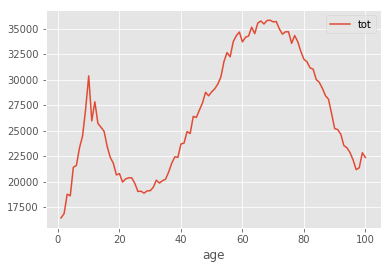

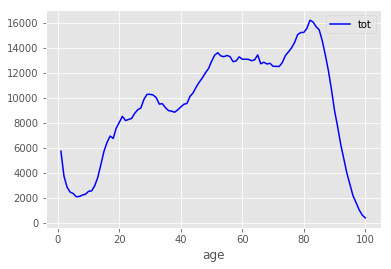

In [27]:
df2.filter(['age', 'tot']).groupby('age').mean().plot(kind='line')
df2.filter(['age', 'tot']).groupby('age').count().plot(kind='line', color='blue')

              tot
sex              
1    31626.936510
2    25948.274025
9             NaN
        tot
sex        
1    407448
2    543856
9         0


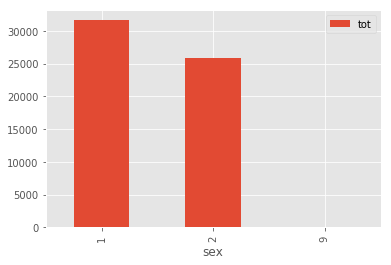

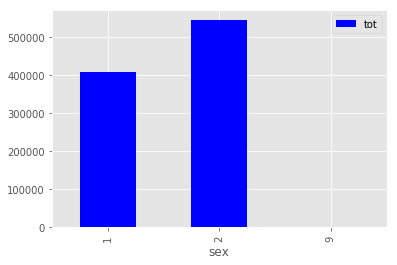

In [28]:
print(df2.filter(['sex', 'tot']).groupby('sex').mean().head())
print(df2.filter(['sex', 'tot']).groupby('sex').count().head())
df2.filter(['sex', 'tot']).groupby('sex').mean().plot(kind='bar')
df2.filter(['sex', 'tot']).groupby('sex').count().plot(kind='bar', color='blue')

Graph components of costs

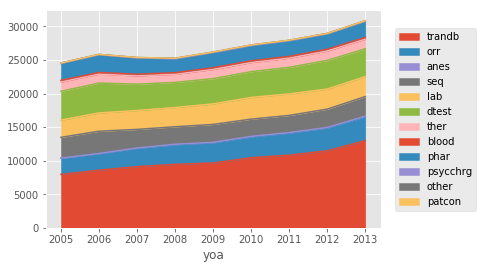

In [29]:
X_var = 'yoa'

col_cost = ['trandb', 'orr', 'anes', 'seq', 'lab', 'dtest', 'ther', 'blood', 'phar',
             'psycchrg', 'other', 'patcon', X_var]

df_cost = df2.filter(col_cost)

mean_cost = df_cost.groupby(X_var).mean().sort_values(by=X_var)
#print(mean_cost)
ax = mean_cost.plot(kind='area',stacked='true')
ax.legend(loc="right", bbox_to_anchor=(1.3, 0.5), ncol=1)
plt.show()

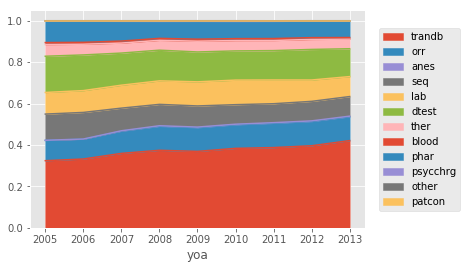

In [30]:
X_var = 'yoa'

col_cost = ['trandb', 'orr', 'anes', 'seq', 'lab', 'dtest', 'ther', 'blood', 'phar',
             'psycchrg', 'other', 'patcon', X_var]

df_cost = df2.filter(col_cost)

mean_cost = df_cost.groupby(X_var).mean().sort_values(by=X_var)
mean_cost = mean_cost.divide(mean_cost.sum(axis=1),axis=0)
#print(mean_cost)
ax = mean_cost.plot(kind='area',stacked='true')
ax.legend(loc="right", bbox_to_anchor=(1.3, 0.5), ncol=1)
plt.show()

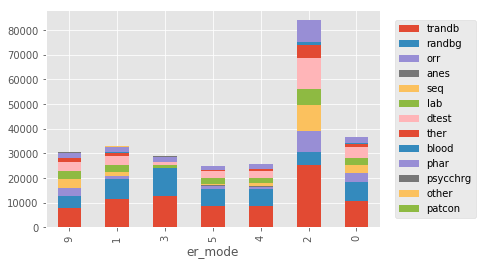

In [31]:
X_var = 'er_mode'

col_cost = ['trandb', 'randbg', 'orr', 'anes', 'seq', 'lab', 'dtest', 'ther', 'blood', 'phar',
             'psycchrg', 'other', 'patcon', X_var]

df_cost = df2.filter(col_cost)

mean_cost = df_cost.groupby(X_var).mean()
rr = df_cost.groupby(X_var).count()/df_cost.count()
ax1 = mean_cost.plot(kind='bar',stacked='true')
ax1.legend(loc="right", bbox_to_anchor=(1.3, 0.5), ncol=1)


plt.show()

                 tot
yoa                 
2005.0  25433.925387
2006.0  26814.851565
2007.0  26379.792670
2008.0  26284.281543
2009.0  27318.012126
2010.0  28592.420517
2011.0  29581.636261
2012.0  30888.181742
2013.0  32576.318410
           tot
yoa           
2005.0   70671
2006.0   71762
2007.0   98177
2008.0  121786
2009.0  123951
2010.0  123510
2011.0  119891
2012.0  115994
2013.0  105562


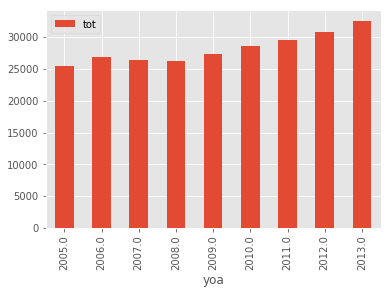

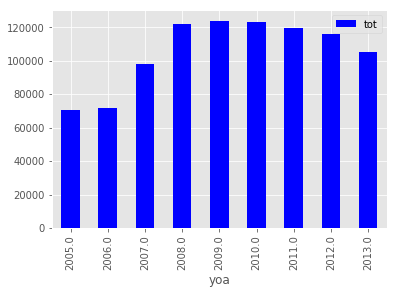

In [32]:
X_var = 'yoa'
y_var = 'tot'
print(df3.filter([X_var, y_var]).groupby(X_var).mean())
df3.filter([X_var, y_var]).groupby(X_var).mean().plot(kind='bar')
print(df3.filter([X_var, y_var]).groupby(X_var).count())
df3.filter([X_var, y_var]).groupby(X_var).count().plot(kind='bar', color='blue')